<H3 align = "left"> Detecting Arrhythmia Variant using Electrocardiogram Data </H3>

In [9]:
##############################################
## Packages Needed for this Assignmnent ##
##############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [32]:
# Import the dataset
dataset = pd.read_csv("MIT-BIH Arrhythmia Database.csv")

TODO:
- take representative sample of dataset (aim for 15,000 rows)
- perform preprocessing 

In [33]:
# Random_state=42 ensures that each time this code runs, we will get the same N rows in the sample 
sampleOfData = dataset.sample(n=15000, random_state=42)

# To get different samples use sampleOfData = dataset.sample(n=NUMBER) 
#sampleOfData = dataset.sample(n=15000)


## Understanding the Data

- "record" is the name of the subject/patient.
- "type" is the target, which contains 5 categories of heart beats:
    1. N (Normal)
    2. SVEB (Supraventricular ectopic beat)
    3. VEB (Ventricular ectopic beat)
    4. F (Fusion beat)
    5. Q (Unknown beat)


## Data Visualization 

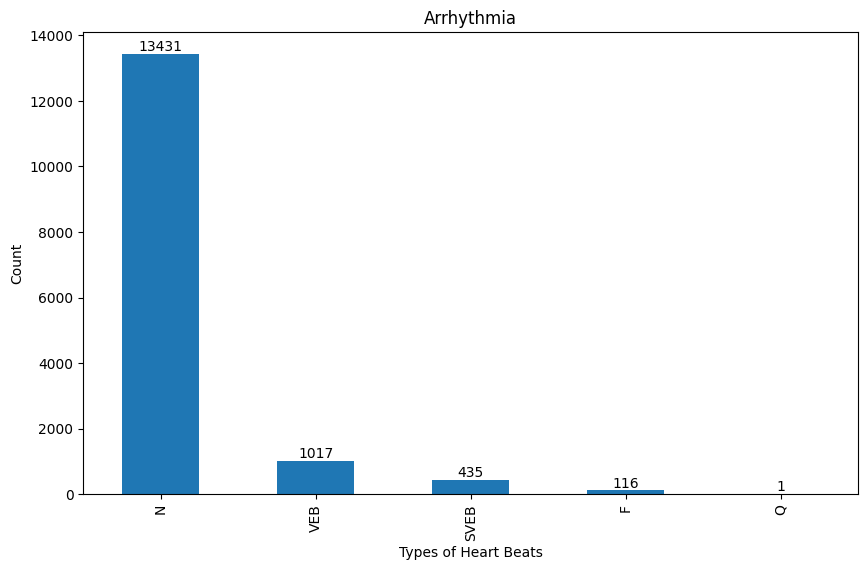

In [35]:
# Entire dataset 
data = dataset['type'].value_counts()

# Sample dataset 
#data = sampleOfData['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
bars = data.plot(kind='bar')

# Set the title and labels
plt.title('Arrhythmia')
plt.xlabel('Types of Heart Beats')
plt.ylabel('Count')

for container in bars.containers:
    bars.bar_label(container)

# Show the plot
plt.show()

### Don't remove the comment below until final! It will take a lot of spaces

In [4]:
#data visualization (before data cleaning)
# features = dataset.drop('type', axis=1).columns
# target = dataset['type']

# fig, axs = plt.subplots(len(features), 1, figsize=(5, 5*len(features)))

# for i, feature in enumerate(features):
#     axs[i].scatter(dataset[feature], target)
#     axs[i].set_xlabel(feature)
#     axs[i].set_ylabel('Heartbeat')

# plt.tight_layout()
# plt.show()

## Data cleaning

In [36]:
#we drop "record" column from our dataset because it is not helpful as "record" is the name of the subject/patient.
dataset.drop('record', axis=1, inplace=True)

In [39]:
# Function to replace outliers with the mean of that column (NOTE: I USED SAMPLEDATA NOT DATA)
def replaceOutliers (sd, column):
    Q1 = sd[column].quantile(0.25)
    Q3 = sd[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR

    # Calculating the mean W/O outliers 
    temp = sd[(sd[column] >= lowerBound) & (sd[column] <= upperBound)]
    mean = temp[column].mean()
    
    sd.loc[(sd[column] < lowerBound) | (sd[column] > upperBound), column] = mean
    return sd

# Columns we want to check for outliers 
columnCheck = [
    '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
    '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval',
    '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0',
    '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '1_pre-RR', '1_post-RR',
    '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak',
    '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0', '1_qrs_morph1',
    '1_qrs_morph2', '1_qrs_morph2', '1_qrs_morph4'
]

for col in columnCheck:
    sampleOfData = replaceOutliers(sampleOfData, col)


# Seeing if theres still same amount of rows after replacing outliers 
print(sampleOfData.shape)


(15000, 34)


In [6]:
#check for the null or missing value in the dataset
dataset.isnull().sum()

type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [7]:
#check for the number of duplicates in the dataset
dataset.duplicated().sum()

0

#### We can encode it with Normal vs Other
#### If not, then the confusion matrix might not be good unless we do multiple comparisons like N vs VEB, N vs SVEB, VEB vs SVEB...

In [8]:
#encode categorical variables using label encoder (N = 1, VEB = 4, SVEB = 3, F = 0, Q = 2)
le = LabelEncoder()
dataset['type'] = le.fit_transform(dataset['type'])

### I did some testing, by removing outliers in the features (excluding "type"), we will be down to about 50k rows...

## Data Analysis

In [ ]:
# Printing the Summary Statistics of the Sample Dataset 
print(sampleOfData.describe())

In [ ]:
# Visualizing the data after replacing the outliers with the mean (NOTE: i want to add this to data visualization seciton but this could only work after cleaning the data)
for column in columnCheck:
    plt.figure(figsize=(5, 2))
    sns.boxplot(y=sampleOfData[column])
    plt.title(column)
    plt.show()

In [ ]:
#check for correlations using heatmaps
correlation = dataset.corr()
sns.heatmap(correlation)
correlation

## Identify the most optimized model

### TODO: Decision Tree, Random Forest, and K-Nearest Neighbors
### TODO: Display results and visualization 

In [46]:
# Target --> identifying the type (N (Normal),  SVEB (Supraventricular ectopic beat)
# VEB (Ventricular ectopic beat), F (Fusion beat), and Q (Unknown beat))

# Features --> all other columns 
X = sampleOfData.drop('type', axis=1)
y = sampleOfData['type']

# Making categorical data into a numerical format 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

# Logistic Regression 
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(X_trainScaled, y_train)
yPredLogReg = logisticReg.predict(X_testScaled)

accuracyLog = accuracy_score(y_test, yPredLogReg)
precision = precision_score(y_test, yPredLogReg, average='weighted')
recall = recall_score(y_test, yPredLogReg, average='weighted')
f1 = f1_score(y_test, yPredLogReg, average='weighted')
cm = confusion_matrix(y_test, yPredLogReg)



